In [90]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip "/content/gdrive/My Drive/Colab Notebooks/hackaton.zip"

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/hackaton/dataset-hard/._1163.wav  
  inflating: hackaton/dataset-hard/3774.wav  
  inflating: __MACOSX/hackaton/dataset-hard/._3774.wav  
  inflating: hackaton/dataset-hard/3012.wav  
  inflating: __MACOSX/hackaton/dataset-hard/._3012.wav  
  inflating: hackaton/dataset-hard/1605.wav  
  inflating: __MACOSX/hackaton/dataset-hard/._1605.wav  
  inflating: hackaton/dataset-hard/2324.wav  
  inflating: __MACOSX/hackaton/dataset-hard/._2324.wav  
  inflating: hackaton/dataset-hard/4755.wav  
  inflating: __MACOSX/hackaton/dataset-hard/._4755.wav  
  inflating: hackaton/dataset-hard/0533.wav  
  inflating: __MACOSX/hackaton/dataset-hard/._0533.wav  
  inflating: hackaton/dataset-hard/0255.wav  
  inflating: __MACOSX/hackaton/dataset-hard/._0255.wav  
  inflating: hackaton/dataset-hard/4033.wav  
  inflating: __MACOSX/hackaton/dataset-hard/._4033.wav  
  inflating: hackaton/dataset-hard/3984.wav  
  inflating: __MACOSX/

In [0]:
pure_dir='hackaton/dataset-easy/'
noisy_dir='hackaton/dataset-hard/'


In [0]:
import os

In [0]:
pure_example=os.path.join(pure_dir, '0394.wav')
noisy_example=os.path.join(noisy_dir, '0044.wav')

In [0]:
sample = os.path.join('hackaton/','samples/e0.wav')

In [0]:
import numpy as np
import argparse
import sys
import librosa

In [0]:
y, sr = librosa.load(noisy_example)

In [0]:
y_pure, sr_pure = librosa.load(pure_example)

In [0]:
from IPython.display import Audio
from scipy.io import wavfile

In [99]:
Audio(noisy_example)

In [100]:
!pip install pysndfx

In [0]:
from pysndfx import AudioEffectsChain

In [102]:
!pip install python_speech_features

In [0]:
import math
import python_speech_features
import scipy as sp
from scipy import signal

In [0]:
median_y = sp.signal.medfilt(y,3)

In [0]:
median_y = sp.ndimage.median_filter(y,3)


In [0]:
path =  "/content/gdrive/My Drive/Colab Notebooks/"

In [0]:
out_med_dest = os.path.join(path, "output_median_12.wav")

In [0]:
librosa.output.write_wav(out_med_dest, median_y, sr)

In [126]:
Audio(out_med_dest)

In [105]:
!pip install noisereduce

In [0]:
import noisereduce as nr

In [0]:
noisy_part = y[0:25000]

In [0]:
reduced_noise = nr.reduce_noise(audio_clip = y, noise_clip = noisy_part, verbose = False)

In [0]:
import matplotlib.pyplot as plt

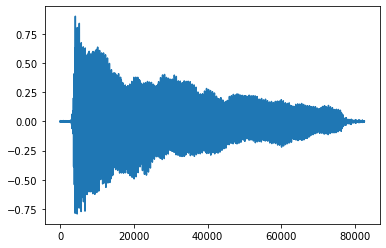

In [26]:
plt.plot(y_pure)
plt.show()

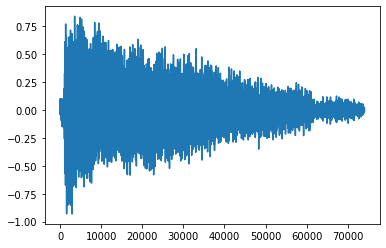

In [27]:
plt.plot(y)
plt.show()

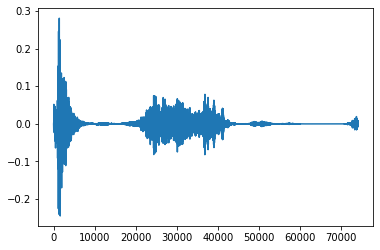

In [28]:
plt.plot(reduced_noise)
plt.show()

In [0]:
path_to_output = os.path.join(path, "out_py_1.wav")

In [0]:
librosa.output.write_wav(path_to_output, reduced_noise, sr)

In [31]:
Audio(path_to_output)

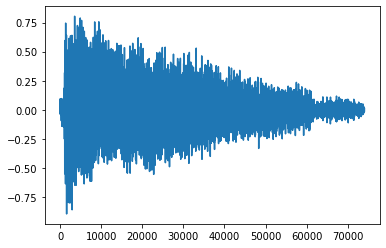

In [132]:
plt.plot(median_y)
plt.show()

In [46]:
!apt -qq install -y sox

The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3
Suggested packages:
  file libsox-fmt-all
The following NEW packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3 sox
0 upgraded, 8 newly installed, 0 to remove and 25 not upgraded.
Need to get 760 kB of archives.
After this operation, 6,715 kB of additional disk space will be used.
Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack

In [0]:
def power_method(y,sr):
  cent = librosa.feature.spectral_centroid(y=y, sr=sr)

  threshold_h = round(np.median(cent))*1.5
  threshold_l = round(np.median(cent))*0.1

  less_noise = AudioEffectsChain().lowshelf(gain=-30.0, frequency=threshold_l, slope=0.8).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5)
  y_clean = less_noise(y)
  return y_clean

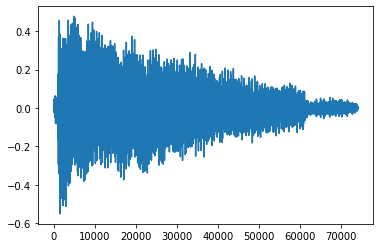

In [65]:
y_clean = power_method(y,sr)
plt.plot(y_clean)
plt.show()

In [0]:
path_to_output = os.path.join(path, "out_py_power_1.wav")

In [0]:
librosa.output.write_wav(path_to_output, y_clean, sr)

In [56]:
Audio(path_to_output)

In [0]:
def noise_centroid_s(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = np.max(cent)
    threshold_l = np.min(cent)

    #less_noise = AudioEffectsChain().lowpass(frequency=threshold_h).highpass(frequency=threshold_l)
    less_noise = AudioEffectsChain().lowshelf(gain=-12.0, frequency=threshold_l, slope=0.5).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5).limiter(gain=6.0)

    y_cleaned = less_noise(y)

    return y_cleaned

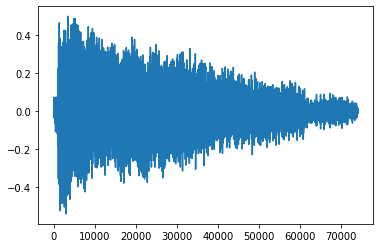

In [87]:
y_clean = noise_centroid_s(y,sr)
plt.plot(y_clean)
plt.show()

In [0]:
path_to_output = os.path.join(path, "out_py_centroid_1.wav")

In [0]:
librosa.output.write_wav(path_to_output, y_clean, sr)

In [72]:
Audio(path_to_output)

In [0]:
def centroid_mb(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = np.max(cent)
    threshold_l = np.min(cent)

    #less_noise = AudioEffectsChain().lowshelf(gain=-30.0, frequency=threshold_l, slope=0.5).highshelf(gain=-30.0, frequency=threshold_h, slope=0.5).limiter(gain=10.0)
    less_noise = AudioEffectsChain().lowpass(frequency=threshold_h).highpass(frequency=threshold_l)
    y_cleaned = less_noise(y)


    cent_cleaned = librosa.feature.spectral_centroid(y=y_cleaned, sr=sr)
    columns, rows = cent_cleaned.shape
    boost_h = math.floor(rows/3*2)
    boost_l = math.floor(rows/6)
    boost = math.floor(rows/3)

    boost_bass = AudioEffectsChain().lowshelf(gain=20.0, frequency=boost, slope=0.8)
    #boost_bass = AudioEffectsChain().lowshelf(gain=16.0, frequency=boost_h, slope=0.5)#.lowshelf(gain=-20.0, frequency=boost_l, slope=0.8)
    y_clean_boosted = boost_bass(y_cleaned)

    return y_clean_boosted


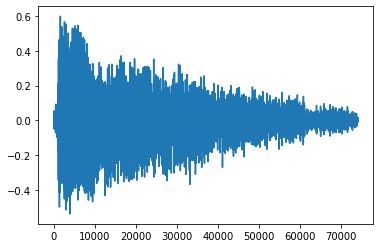

In [83]:
y_clean = centroid_mb(y,sr)
plt.plot(y_clean)
plt.show()

In [0]:
def mfcc_down(y, sr):

    hop_length = 512

    ## librosa
    # mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
    # librosa.mel_to_hz(mfcc)

    ## mfcc
    mfcc = python_speech_features.base.mfcc(y)
    mfcc = python_speech_features.base.logfbank(y)
    mfcc = python_speech_features.base.lifter(mfcc)

    sum_of_squares = []
    index = -1
    for r in mfcc:
        sum_of_squares.append(0)
        index = index + 1
        for n in r:
            sum_of_squares[index] = sum_of_squares[index] + n**2

    strongest_frame = sum_of_squares.index(max(sum_of_squares))
    hz = python_speech_features.base.mel2hz(mfcc[strongest_frame])

    max_hz = max(hz)
    min_hz = min(hz)

    speech_booster = AudioEffectsChain().highshelf(frequency=min_hz*(-1)*1.2, gain=-12.0, slope=0.6).limiter(gain=8.0)
    y_speach_boosted = speech_booster(y)

    return (y_speach_boosted)

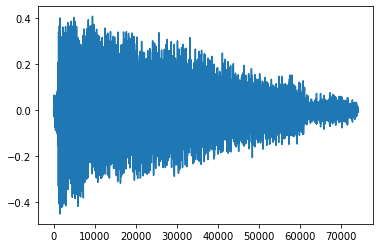

In [89]:
y_clean = mfcc_down(y,sr)
plt.plot(y_clean)
plt.show()

In [0]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_med = librosa.decompose.nn_filter(chroma,aggregate=np.median,metric='cosine')

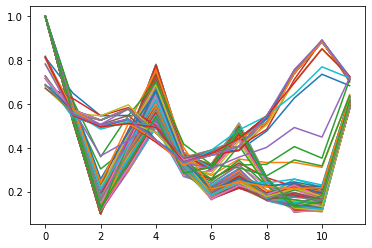

In [114]:
plt.plot(chroma_med)
plt.show()

In [0]:
fft_y = librosa.stft(y)

In [0]:
w_y = sp.signal.wiener(fft_y)

In [0]:
ifft_y = librosa.istft(w_y)

In [0]:
norm_y= librosa.util.normalize(ifft_y)

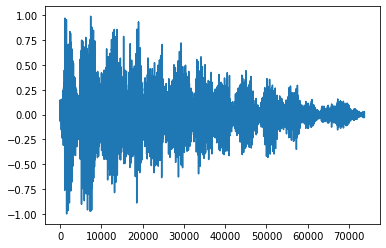

In [156]:
plt.plot(norm_y)
plt.show()

In [140]:
path_to_output = os.path.join(path, "out_py_weiner.wav")
librosa.output.write_wav(path_to_output, ifft_y, sr)
Audio(path_to_output)

In [0]:
#Spectral Subtraction
# short-time Fourier transfor (STFT)
    #  (n_fft = 2048, hop_length = win_length(=n_fft) / 4, window = 'hann')
    # D: np.ndarray [shape=(1+n_fft / 2, t) T = t * hop_length])
S = np.abs(librosa.stft(y))

    # Convert a power spectrogram to decibel(dB)
D = librosa.power_to_db(S**2)

    # Calc Noise FrameRate
_n_fft = 2048
_hop_length = _n_fft / 4
noise_start = int(_hop_length * float(0))
noise_finish = int(_hop_length * float(4))

    # Noise Copy and calc Average powers
noise_D = D[:, noise_start : noise_finish]
noise_Ave = np.average(noise_D, axis = 1)

    # Calc Spectral Subtraction
D = D.transpose()
SS = D - noise_Ave
SS = SS.transpose()

    # Convert decibel to power spectrogram
SSP = librosa.db_to_power(SS)
    
    # Inverse short-time Fourier transfor(ISTFT)
OutputS = librosa.istft(SSP)

    #(normalize)
OutputS = librosa.util.normalize(OutputS)

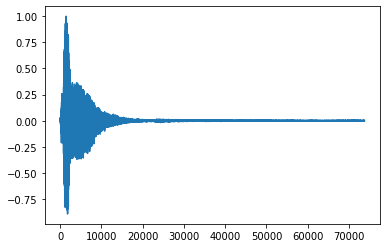

In [181]:
plt.plot(OutputS)
plt.show()

In [160]:
path_to_output = os.path.join(path, "out_py_Spectral_Subtraction.wav")
librosa.output.write_wav(path_to_output, OutputS, sr)
Audio(path_to_output)

In [0]:
def fftnoise(f):
    f = np.array(f, dtype="complex")
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1 : Np + 1] *= phases
    f[-1 : -1 - Np : -1] = np.conj(f[1 : Np + 1])
    return np.fft.ifft(f).real


def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1 / samplerate))
    f = np.zeros(samples)
    f[np.logical_and(freqs >= min_freq, freqs <= max_freq)] = 1
    return fftnoise(f)

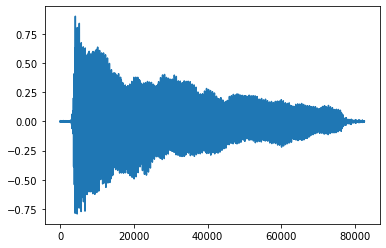

In [169]:
plt.plot(y_pure)
plt.show()

In [0]:
#add noise
noise_len = 3 # seconds
noise = band_limited_noise(min_freq=4000, max_freq = 12000, samples=len(y_pure), samplerate=sr_pure)*10
noise_clip = noise[:sr_pure*noise_len]
audio_clip_band_limited = y_pure+noise

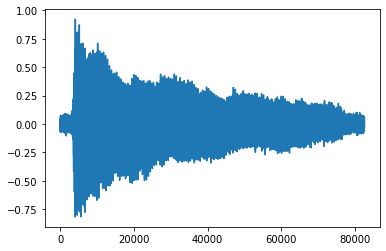

In [183]:
plt.plot(audio_clip_band_limited)
plt.show()